# WeatherPy
----


## Analysis

* In general, temperatures decrease as you move further away from the equator.
* The highest temperatures don't seem to be at the equator but slightly north, roughly 20 to 40 degrees latitude.
* In the Southern Hemisphere, wind speeds seem to decrease as you move closer to the equator. However, this is only a very slight correlation.
* Overall, temperature is the only metric that has a clear relationship when compared to latitude. When looking at humidity, cloudiness, and wind speed, latitude has little or no effect.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set empty lists to hold information
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
found_cities = []

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL"
query_url = f"{url}appid={api_key}&units={units}&q="

# Set count to iterate over and print initial statements
records = 1
sets = 1

print("Beginning Data Retrieval")
print("-------------------------------")

# Loop through list of cities and perform a request for data
for city in cities:
    
    # Create search query, make request, and store in json
    response = requests.get(query_url + city).json()
    
    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    
    # Try to pull data and print that it was successful
    try:
        print(f"Processing Record {records} of Set {sets} | {city}")
        
        #Add data to lists
        found_cities.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
    except:
        print("City not found. Skipping ...")
    
    # Iterate records and sets
    records += 1
    
    if records == 50:
        records = 0
        sets += 1
    
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | rio grande
Processing Record 4 of Set 1 | sentyabrskiy
City not found. Skipping ...
Processing Record 5 of Set 1 | kem
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | lagoa
Processing Record 9 of Set 1 | hailey
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | kavieng
Processing Record 12 of Set 1 | ternate
Processing Record 13 of Set 1 | kenai
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | akdepe
Processing Record 18 of Set 1 | progreso
Processing Record 19 of Set 1 | port-cartier
Processing Record 20 of Set 1 | yamethin
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | avarua
Processing Record 23 of Set 1 | south ri

Processing Record 39 of Set 4 | puerto del rosario
Processing Record 40 of Set 4 | veraval
Processing Record 41 of Set 4 | georgetown
Processing Record 42 of Set 4 | lenger
Processing Record 43 of Set 4 | yar-sale
Processing Record 44 of Set 4 | santiago
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | grand river south east
City not found. Skipping ...
Processing Record 47 of Set 4 | yanam
Processing Record 48 of Set 4 | fare
Processing Record 49 of Set 4 | coahuayana
Processing Record 0 of Set 5 | talara
Processing Record 1 of Set 5 | pathardi
Processing Record 2 of Set 5 | barawe
City not found. Skipping ...
Processing Record 3 of Set 5 | bubaque
Processing Record 4 of Set 5 | agirish
Processing Record 5 of Set 5 | aklavik
Processing Record 6 of Set 5 | los llanos de aridane
Processing Record 7 of Set 5 | amderma
City not found. Skipping ...
Processing Record 8 of Set 5 | paamiut
Processing Record 9 of Set 5 | xining
Processing Record 10 of Set 5 | aykhal
Proces

Processing Record 23 of Set 8 | saint anthony
Processing Record 24 of Set 8 | sayansk
Processing Record 25 of Set 8 | artyk
City not found. Skipping ...
Processing Record 26 of Set 8 | shingu
Processing Record 27 of Set 8 | wuwei
Processing Record 28 of Set 8 | smithers
Processing Record 29 of Set 8 | marsa matruh
Processing Record 30 of Set 8 | zhangjiakou
Processing Record 31 of Set 8 | lasa
Processing Record 32 of Set 8 | yokadouma
Processing Record 33 of Set 8 | wilmington
Processing Record 34 of Set 8 | torit
Processing Record 35 of Set 8 | grootfontein
Processing Record 36 of Set 8 | port hardy
Processing Record 37 of Set 8 | dingli
Processing Record 38 of Set 8 | sabzevar
Processing Record 39 of Set 8 | vicente guerrero
Processing Record 40 of Set 8 | falkoping
City not found. Skipping ...
Processing Record 41 of Set 8 | anadyr
Processing Record 42 of Set 8 | bambous virieux
Processing Record 43 of Set 8 | ixtapa
Processing Record 44 of Set 8 | jian
Processing Record 45 of Set 8

Processing Record 9 of Set 12 | blagoyevo
Processing Record 10 of Set 12 | brae
Processing Record 11 of Set 12 | talnakh
Processing Record 12 of Set 12 | mangai
Processing Record 13 of Set 12 | mae ramat
Processing Record 14 of Set 12 | bonthe
Processing Record 15 of Set 12 | chicama
Processing Record 16 of Set 12 | polyarnyy
Processing Record 17 of Set 12 | mullingar
Processing Record 18 of Set 12 | beyneu
Processing Record 19 of Set 12 | gladstone
Processing Record 20 of Set 12 | bulgan
Processing Record 21 of Set 12 | chimay
Processing Record 22 of Set 12 | man
Processing Record 23 of Set 12 | port hawkesbury
Processing Record 24 of Set 12 | tutzing
Processing Record 25 of Set 12 | port keats
Processing Record 26 of Set 12 | sribne
Processing Record 27 of Set 12 | tilichiki
Processing Record 28 of Set 12 | karamken
City not found. Skipping ...
Processing Record 29 of Set 12 | uruguaiana
Processing Record 30 of Set 12 | bereda
Processing Record 31 of Set 12 | pedasi
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
# Create dictionary

weather_dict = {
    "City" : found_cities,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed,
    "Country" : country,
    "Date" : date
}

# Create dataframe
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

# Export dataframe to csv
weather_data.to_csv("weather_data.csv")

In [5]:
# Generate and view summary statistics
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,20.833303,13.744078,68.932178,71.627949,55.235935,8.012777,1.660427e+09
std,33.332630,90.957441,14.579170,19.725698,39.112642,5.283228,2.590266e+02
min,-54.800000,-175.200000,33.820000,1.000000,0.000000,0.000000,1.660426e+09
25%,-6.898900,-70.366650,56.295000,62.000000,12.000000,3.890000,1.660427e+09
50%,25.038900,15.640100,71.760000,76.000000,68.000000,6.910000,1.660427e+09
75%,49.218700,98.019700,79.720000,86.000000,96.000000,10.960000,1.660427e+09
max,78.218600,179.316700,103.420000,100.000000,100.000000,30.180000,1.660428e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
No humidity outliers were present. That is, all humidity values were less than 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

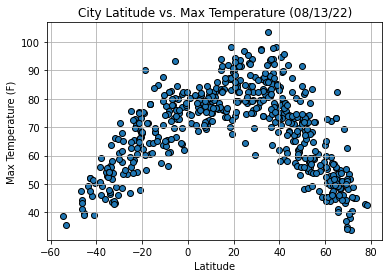

In [6]:
# Generate scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], edgecolors = 'black')
plt.title("City Latitude vs. Max Temperature (08/13/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Latitude_vs_Temperature.png")
plt.show()

## Latitude vs. Temperature Plot Analysis

This plot is analyzing max temperature in Farenheit for cities at various distances from the equator. It shows what is generally expected, temperatures decrease as you move further away from the equator.

## Latitude vs. Humidity Plot

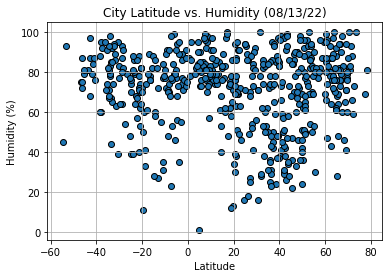

In [7]:
# Generate scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], edgecolors = 'black')
plt.title("City Latitude vs. Humidity (08/13/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Latitude_vs_Humidity.png")
plt.show()

## Latitude vs. Humidity Plot Analysis

This plot is analyzing humidity for cities at various distances from the equator. It shows no discernible relationship between latitude and humidity.

## Latitude vs. Cloudiness Plot

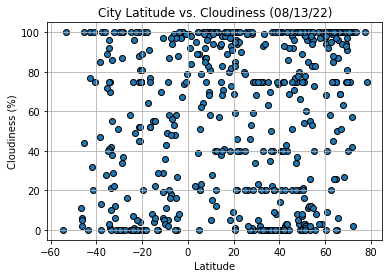

In [8]:
# Generate scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], edgecolors = 'black')
plt.title("City Latitude vs. Cloudiness (08/13/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

## Latitude vs. Cloudiness Plot Analysis

This plot is analyzing cloudiness for cities at various distances from the equator. It shows no discernible relationship between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

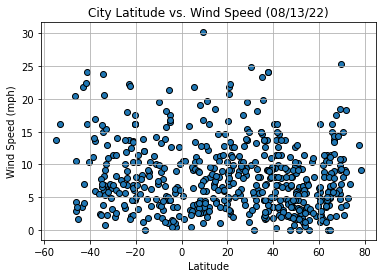

In [9]:
# Generate scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], edgecolors = 'black')
plt.title("City Latitude vs. Wind Speed (08/13/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Latitude_vs_Wind_Speed.png")
plt.show()

## Latitude vs. Wind Speed Plot Analysis

This plot is analyzing wind speed for cities at various distances from the equator. It shows no discernible relationship between latitude and wind speed.

## Linear Regression

In [10]:
# Pull out cities in Northern Hemisphere and add them to a new dataframe
northern_hemisphere_df = weather_data.loc[weather_data["Lat"] >= 0]
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Kem',64.9555,34.5793,53.13,68,50,6.26,RU,1660426881
4,Kapaa,22.0752,-159.3190,82.47,69,40,12.66,US,1660426645
6,Lagoa,39.0500,-27.9833,75.11,88,0,10.96,PT,1660426782
7,Hailey,43.5196,-114.3153,91.89,34,0,11.50,US,1660426886
8,Albany,42.6001,-73.9662,78.39,42,2,3.24,US,1660426312


In [11]:
# Pull out cities in Southern Hemisphere and add them to a new dataframe
southern_hemisphere_df = weather_data.loc[weather_data["Lat"] < 0]
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,47.59,75,11,20.45,NZ,1660426786
1,Hobart,-42.8794,147.3294,52.27,97,100,21.85,AU,1660426818
2,Rio Grande,-32.0350,-52.0986,66.31,86,12,6.49,BR,1660426878
5,Ancud,-41.8697,-73.8203,45.93,79,32,22.50,CL,1660426721
9,Kavieng,-2.5744,150.7967,81.73,74,100,8.93,PG,1660426722


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.5044836545206356


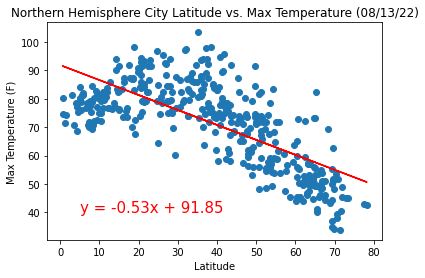

In [12]:
# Generate scatter plot, regression line, and regression equation
north_temp_x_values = northern_hemisphere_df["Lat"]
north_temp_y_values = northern_hemisphere_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_temp_x_values, north_temp_y_values)
north_temp_regress_values = north_temp_x_values * slope + intercept
north_temp_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_temp_x_values, north_temp_y_values)
plt.plot(north_temp_x_values, north_temp_regress_values, "r-")
plt.annotate(north_temp_line_eq, (5,40), fontsize = 15, color = "red")
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (08/13/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared value is: {rvalue ** 2}")
plt.savefig("Northern_Hemisphere_Temperature_Regression.png")
plt.show()

#### Northern Hemisphere - Max Temp Analysis

The regression analysis suggests that there is a moderate negative relationship. This makes sense as it generally gets colder as you get further away from the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.6396470956077924


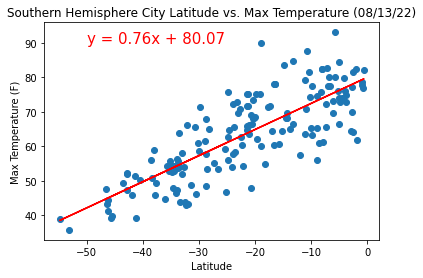

In [13]:
# Generate scatter plot, regression line, and regression equation
south_temp_x_values = southern_hemisphere_df["Lat"]
south_temp_y_values = southern_hemisphere_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_temp_x_values, south_temp_y_values)
south_temp_regress_values = south_temp_x_values * slope + intercept
south_temp_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_temp_x_values, south_temp_y_values)
plt.plot(south_temp_x_values, south_temp_regress_values, "r-")
plt.annotate(south_temp_line_eq, (-50,90), fontsize = 15, color = "red")
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (08/13/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared value is: {rvalue ** 2}")
plt.savefig("Southern_Hemisphere_Temperature_Regression.png")
plt.show()

#### Southern Hemisphere - Max Temp Analysis

The regression analysis suggests that there is a moderate to strong positive relationship. This makes sense as it generally gets warmer as you get closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.00019642360783448233


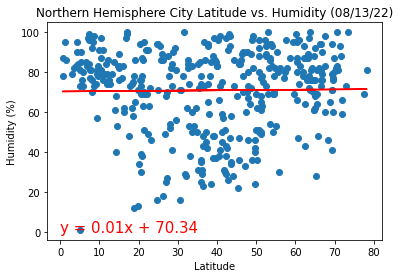

In [14]:
# Generate scatter plot, regression line, and regression equation
north_humidity_x_values = northern_hemisphere_df["Lat"]
north_humidity_y_values = northern_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_humidity_x_values, north_humidity_y_values)
north_humidity_regress_values = north_humidity_x_values * slope + intercept
north_humidity_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_humidity_x_values, north_humidity_y_values)
plt.plot(north_humidity_x_values, north_humidity_regress_values, "r-")
plt.annotate(north_humidity_line_eq, (0,0), fontsize = 15, color = "red")
plt.title("Northern Hemisphere City Latitude vs. Humidity (08/13/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared value is: {rvalue ** 2}")
plt.savefig("Northern_Hemisphere_Humidity_Regression.png")
plt.show()

#### Northern Hemisphere - Humidity Analysis

The regression analysis suggests that there is no discernible correlation between humidity and latitude in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.018492985326993765


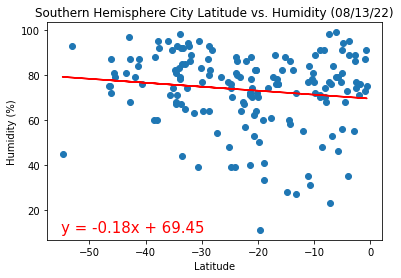

In [15]:
# Generate scatter plot, regression line, and regression equation
south_humidity_x_values = southern_hemisphere_df["Lat"]
south_humidity_y_values = southern_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_humidity_x_values, south_humidity_y_values)
south_humidity_regress_values = south_humidity_x_values * slope + intercept
south_humidity_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_humidity_x_values, south_humidity_y_values)
plt.plot(south_humidity_x_values, south_humidity_regress_values, "r-")
plt.annotate(south_humidity_line_eq, (-55,10), fontsize = 15, color = "red")
plt.title("Southern Hemisphere City Latitude vs. Humidity (08/13/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared value is: {rvalue ** 2}")
plt.savefig("Southern_Hemisphere_Humidity_Regression.png")
plt.show()

#### Southern Hemisphere - Humidity Analysis

Regression analysis suggests that there is a very weak negative correlation between humidity and latitude in the Southern Hemisphere. The relationship is far too weak to make any reasonable predictions.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.00040075675730020247


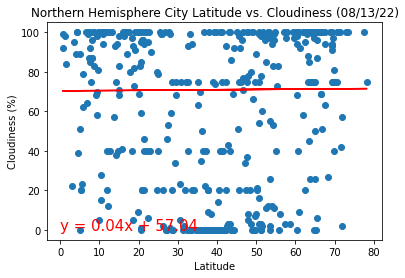

In [16]:
# Generate scatter plot, regression line, and regression equation
north_cloudiness_x_values = northern_hemisphere_df["Lat"]
north_cloudiness_y_values = northern_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cloudiness_x_values, north_cloudiness_y_values)
north_cloudiness_regress_values = north_cloudiness_x_values * slope + intercept
north_cloudiness_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cloudiness_x_values, north_cloudiness_y_values)
plt.plot(north_humidity_x_values, north_humidity_regress_values, "r-")
plt.annotate(north_cloudiness_line_eq, (0,0), fontsize = 15, color = "red")
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (08/13/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared value is: {rvalue ** 2}")
plt.savefig("Northern_Hemisphere_Cloudiness_Regression.png")
plt.show()

#### Northern Hemisphere - Cloudiness Analysis

The regression analysis suggests that there is no discernible correlation between cloudiness and latitude in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.013130778372774859


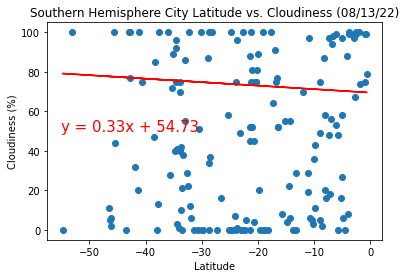

In [17]:
# Generate scatter plot, regression line, and regression equation
south_cloudiness_x_values = southern_hemisphere_df["Lat"]
south_cloudiness_y_values = southern_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cloudiness_x_values, south_cloudiness_y_values)
south_cloudiness_regress_values = south_cloudiness_x_values * slope + intercept
south_cloudiness_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cloudiness_x_values, south_cloudiness_y_values)
plt.plot(south_humidity_x_values, south_humidity_regress_values, "r-")
plt.annotate(south_cloudiness_line_eq, (-55,50), fontsize = 15, color = "red")
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (08/13/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared value is: {rvalue ** 2}")
plt.savefig("Southern_Hemisphere_Cloudiness_Regression.png")
plt.show()

#### Southern Hemisphere - Humidity Analysis

Regression analysis suggests that there is a very weak negative correlation between cloudiness and latitude in the Southern Hemisphere. The relationship is far too weak to make any reasonable predictions.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.010508262630271662


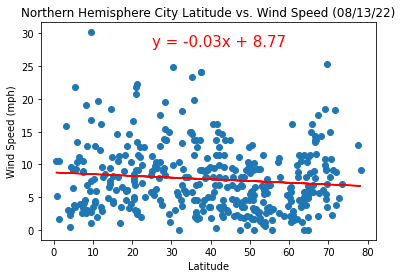

In [20]:
# Generate scatter plot, regression line, and regression equation
north_wind_x_values = northern_hemisphere_df["Lat"]
north_wind_y_values = northern_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_wind_x_values, north_wind_y_values)
north_wind_regress_values = north_wind_x_values * slope + intercept
north_wind_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_wind_x_values, north_wind_y_values)
plt.plot(north_wind_x_values, north_wind_regress_values, "r-")
plt.annotate(north_wind_line_eq, (25,28), fontsize = 15, color = "red")
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (08/13/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared value is: {rvalue ** 2}")
plt.savefig("Northern_Hemisphere_Wind_Speed_Regression.png")
plt.show()

#### Northern Hemisphere - Wind Speed Analysis

The regression analysis suggests that there is no discernible correlation between wind speed and latitude in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.031014670325818845


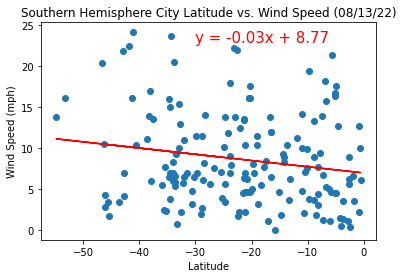

In [23]:
# Generate scatter plot, regression line, and regression equation
south_wind_x_values = southern_hemisphere_df["Lat"]
south_wind_y_values = southern_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_wind_x_values, south_wind_y_values)
south_wind_regress_values = south_wind_x_values * slope + intercept
south_wind_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_wind_x_values, south_wind_y_values)
plt.plot(south_wind_x_values, south_wind_regress_values, "r-")
plt.annotate(north_wind_line_eq, (-30,23), fontsize = 15, color = "red")
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (08/13/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared value is: {rvalue ** 2}")
plt.savefig("Southern_Hemisphere_Wind_Speed_Regression.png")
plt.show()

#### Southern Hemisphere - Wind Speed Analysis

The regression analysis suggests that there is no discernible correlation between wind speed and latitude in the Southern Hemisphere.